In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('../imgpack/Monobanda/7_Lake Erie.jpg',cv2.IMREAD_GRAYSCALE)

<h2>Corte de colas:</h2>
<p>Realizaremos un corte de colas a una imagen monobanda a partir de un porcentaje de corte proporcionado como parámetro de entrada de la función corte.</p>

In [3]:
#Histograma modificando la función para que devuelva el histograma y no devuelva nada por pantalla:
def Histograma(imagen):
    h={x:0 for x in range(256)}  #Diccionario generado con valores de x dentro del rango [0, 255] y con valores 0
    for x in imagen:
        for y in x:
            h[y]=h[y]+1   #se introducen los nuevos valores en el histograma
    return list(h.values())   #devuelve el histograma

In [4]:
#Función expan:
def expan(img,cmin,cmax):
    resimg=img.copy()  #copia de la imagen
    for x in range(resimg.shape[0]):         
        for y in range(resimg.shape[0]):     
            if resimg[x][y]<=cmin:           #Todos los píxeles con ND<=cmin
                resimg[x][y]=0               #se ponen a negro
            elif resimg[x][y]>=cmax:         #Todos los píxeles con ND>=cmax
                resimg[x][y]=255             #se ponen a blanco
            else:                            #Para píxeles intermedios se aplica la fórmula:
                resimg[x][y]=0+((resimg[x][y]-cmin)/(cmax-cmin))*(255-0)   #ND'ij = ND'min+(NDij-NDcortemin)*(ND0max-ND'min)/(NDcortemax-NDcortemin)
    return resimg

In [5]:
def corte(img,porc):
    resimg=img.copy()
    histograma=Histograma(img)   #histograma de la imagen de entrada
    tam=img.size                 #total de píxeles
    porct=int(tam*porc)          #porcentaje de píxeles que se dejan fuera de la iteración sobre el histograma
    #inicialización de los cortes en caso de que el porc que se pasa no sea mayor que 0 (es decir, los cortes serían los mismos
    #que en la función expan)
    cmin=0
    cmax=255                          
    #corte máximo:
    for x in range(len(histograma)-1,0,-1): 
        #mientras el porcentaje sea mayor que cero, empezando por el último píxel y saltando de uno en uno hacia atrás,
        #se disminuye en 1 el valor del porcentaje de píxeles hasta llegar al primer x del histograma fuera de ese porcentaje, 
        #que sería el corte máximo:
        while porct>0 and histograma[x]>0:   
            histograma[x]=histograma[x]-1
            porct=porct-1
            cmax=x       #corte máximo
    #corte mínimo:
    for x in range(len(histograma)):  #en el rango [0,255]
        #mientras el valor del porcentaje calculado anteriormente sea mayor que cero, y el valor del histograma también,
        #se disminuye en 1 el valor del porcentaje de píxeles y el primer x fuera de ese porcentaje es donde se establece 
        #el corte mínimo:
        while porct>0 and histograma[x]>0:   
            histograma[x]=histograma[x]-1    
            porct=porct-1                    
            cmin=x      #corte mínimo
    resimg=expan(resimg,cmin,cmax)
    return resimg

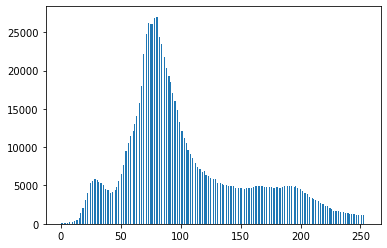

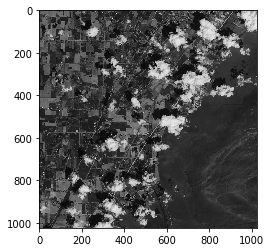

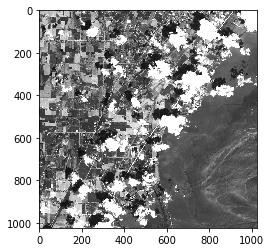

In [7]:
#Aplica el corte de colas:
img_exp=corte(img,0.10)
#Dibuja el histograma entre 0 y 254:
plt.hist(img_exp.ravel(),255,[0,254],width=1)
plt.show()
plt.figure(1)
plt.imshow(img,cmap='gray')
plt.figure(2)
plt.imshow(img_exp,cmap='gray')